# typing.Callable
Well, I'm not familiar with this kind of type notation. So to begin with, I'd like to try something with the Callable type notation.

In [1]:
from typing import Callable

def log_function(func: Callable[..., None]) -> None:
    print(f"Calling function: {func.__name__}")
    func()

def hello():
    print("Hello, world!")

log_function(hello)

Calling function: hello
Hello, world!


# Forward derivative
Why I'd like to use **forward derivative** is that I think the $$\frac{func(input_ + delta) - func(input_ - delta)} {2 * delta} $$ form in this book is totally wrong w.r.t. Calculus knowledge.

It is worth noticing that Python does **not support function reload** like this!

```Python
def deriv(func: Callable[[np.ndarray], np.ndarray],
          input_: np.ndarray,
          delta: float=0.001) -> np.ndarray:
    return (func(input_ + delta) - func(input_)) / delta

def deriv(func: Callable[[torch.tensor], torch.tensor],
          input_: torch.tensor,
          delta: float=0.001) -> torch.tensor:
    return (func(input_ + delta) - func(input_)) / delta
```


And generic type need use **square brackets like "[]"** instead of parenthesis like "()".

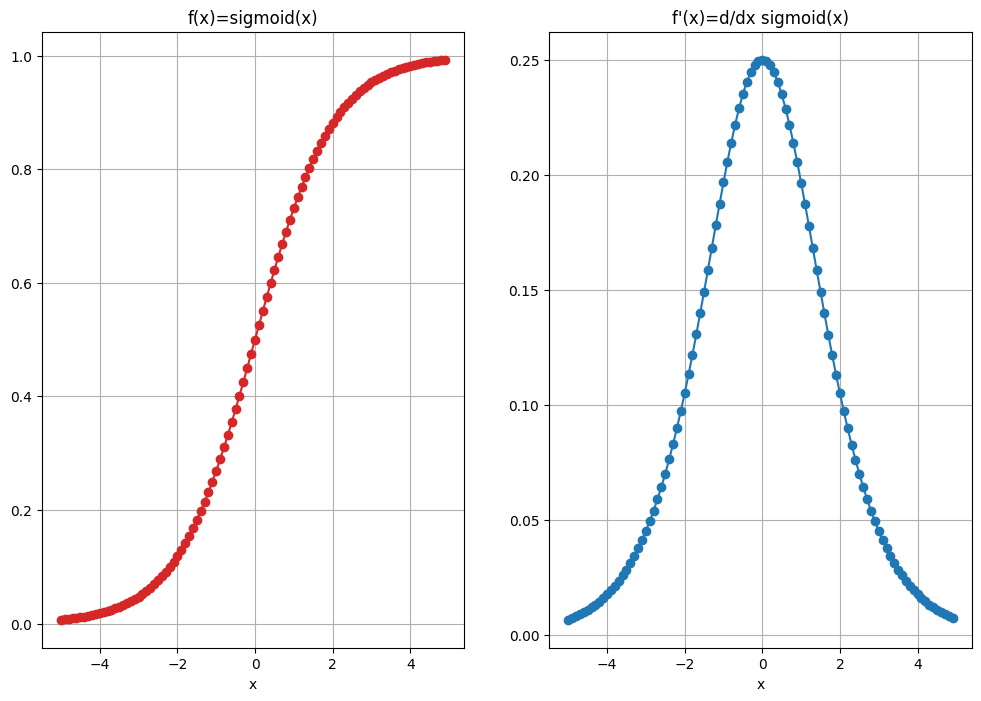

In [14]:
import numpy as np
from typing import Callable, Union
import torch
import matplotlib.pyplot as plt

def deriv(func: Callable[[Union[np.ndarray, torch.tensor]], Union[np.ndarray, torch.tensor]],
          input_: Union[np.ndarray, torch.tensor],
          delta: float=0.001) -> Union[np.ndarray, torch.tensor]:
    '''
    To calculate the derivative of func(x) with respect to x
    :param func: original function
    :param input_: auto variable
    :param delta: derivative of auto variable
    :return: derivative of func
    '''
    return (func(input_ + delta) - func(input_)) / delta

x = torch.arange(-5, 5, 0.1)
y = torch.sigmoid(x)
dy_dx = deriv(torch.sigmoid, x)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x, y, color='tab:red', marker='o')
ax2.plot(x, dy_dx, color='tab:blue', marker='o')
ax1.grid(True)
ax2.grid(True)
ax1.set_title("f(x)=sigmoid(x)")
ax2.set_title("f'(x)=d/dx sigmoid(x)")
ax1.set_xlabel("x")
ax2.set_xlabel("x")
plt.show()